In [17]:
# importing the dependencies
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [18]:
# splitting the dataset into train and test data
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

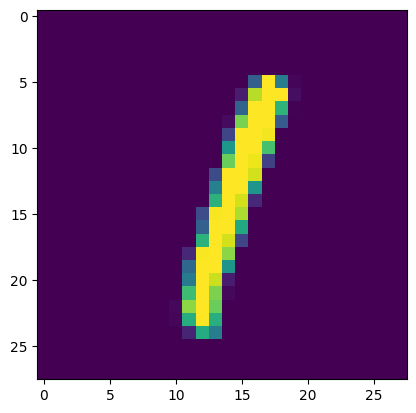

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_test[5])

In [20]:
x_train = x_train/255    # converting each images into single pixel
x_test = x_test/255

In [21]:
model = Sequential()      # Model building

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam')   # compiling the model

In [25]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(x_train,y_train,epochs =50,validation_split = 0.2,callbacks = [callback])     # training the model

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2783 - val_loss: 0.1360
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1154 - val_loss: 0.1090
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0781 - val_loss: 0.0931
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0610 - val_loss: 0.1014
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0468 - val_loss: 0.1031
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0358 - val_loss: 0.0906
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0302 - val_loss: 0.0947
Epoch 8/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0263 - val_loss: 0.0982
Epoch 9/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0209 - val_loss: 0.1082
Epoch 10/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.01

In [26]:
pred = model.predict(x_test)         # testing the model

313/313 [==============================] - 1s 2ms/step


In [27]:
y_pred = pred.argmax(axis = 1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)           # checking the accuracy score

0.9777

In [29]:
model.predict(x_test[5].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 21ms/step


array([1])